# Lista 3
## Metody numeryczne
### Magdalena Ryś 276004

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

### Zadanie 1
Rozwiąż (w pojedynczej precyzji) układ równań $$A_{5×5} \overrightarrow{x} = \overrightarrow{b},$$
gdzie $A_{5×5}$  to macierz Hilberta i $\overrightarrow{b} = (5, 4, 3, 2, 1)^T$. Skorzystaj z metody
iteracyjnego poprawiania rozwiązań.

In [3]:
def hilbert(n: int) -> np.array:
    """
    Function:
        Funkcja zwraca macierz hilberta o podanych wymiarach
    Input:
        n (int) - wymiar macierzy hilberta
    Output:
        result (array) - macierz hilberta
    """
    result = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            result[i][j] = 1 / (i+j+1)
    return result

In [4]:
def gauss_elimination(matrix_A: list[list[float]], matrix_b: list[float]) -> list[float]:
    '''
    Function:
        Funkcja rozwiązująca równanie za pomocą metody eliminacji gaussa
    Input:
        matrix_A (list of lists) - macierz A
        matrix_b (list) - lista b
    Output:
        x (list) - macierz rozwiązań
    '''
    A = np.copy(matrix_A)  
    b = np.copy(matrix_b) 
    n = len(A)

    for i in range(n - 1):
        if A[i][i] == 0: 
            for j in range(i + 1, n):
                if A[j][i] != 0:
                    A[i], A[j] = A[j], A[i]
                    b[i], b[j] = b[j], b[i]
                    break

        for k in range(i + 1, n):
            if A[k][i] != 0:
                factor = A[k][i] / A[i][i]
                for c in range(i, n):
                    A[k][c] -= factor * A[i][c]
                b[k] -= factor * b[i]

    x = [0] * n
    for i in range(n - 1, -1, -1):
        sum_ax = 0
        for j in range(i + 1, n):
            sum_ax += A[i][j] * x[j]
        x[i] = (b[i] - sum_ax) / A[i][i]

    return x

In [ ]:
def iterative_refinement(matrix_A: list[list[float]], matrix_b: list[float], eps=1e-16, max_iter=100) -> list[float]:
    """
    Function:
        Funkcja rozwiązująca równanie metodą iteracyjnego poprawiania rozwiązań
    Input:
        matrix_A (list of lists) - macierz A
        matrix_b (list) - wektor b
        eps (float) - dokładność, domyślnie 10^(-16)
        max_iter (int) - maksymalna liczba iteracji dla bezpieczeństwa
    Output:
        x (list) - poprawione rozwiązanie
    """
    x = np.array(gauss_elimination(matrix_A, matrix_b))

    for _ in range(max_iter):
        r = np.array(matrix_b) - np.dot(matrix_A, x)
        
        if np.linalg.norm(r) < eps:
            break
        
        d = np.array(gauss_elimination(matrix_A, r.tolist()))
        x += d 

    return x


In [6]:
hilbert_matrix = np.array(hilbert(5), dtype=np.float32)
b = np.array([5, 4, 3, 2, 1])

print("rozwiązanie eliminacja gaussa:    ", gauss_elimination(hilbert_matrix, b))
print("iteracyjne poprawianie rozwiązań: ", iterative_refinement(hilbert_matrix, b))
print("rozwiązanie funkcji wbudowanej:   ", np.linalg.solve(hilbert_matrix, b))

rozwiązanie eliminacja gaussa:     [np.float64(-0.999999284744348), np.float64(11.999998569488696), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
iteracyjne poprawianie rozwiązań:  [   -94.84781941   2157.10127274 -10697.32231832  17900.65789655
  -9440.46525295]
rozwiązanie funkcji wbudowanej:    [   -94.84781941   2157.10127275 -10697.32231836  17900.65789661
  -9440.46525298]


Po wykorzystaniu funkcji iteracyjnego poprawiania rozwiązań, rozwiązanie równania z macierzą hilberta zostało widocznie poprawione do postaci rozwiązania funkcji wbudowanej numpy.

### Zadanie 2
Napisz program rozwiązujący poniższy układ równań metodą GaussaSeidla:

![alt text](macierz_lista3.png)

Program powinien działać dla dowolnych n. Przeprowadź obliczenia dla
n = 20 i sprawdź zbieżność rozwiązania.


In [20]:
def gauss_seidel(A, b, tolerance=1e-20, max_iter=2000):
    """
    Function:
        Funkcja rozwiązująca układ równań metodą Gaussa-Seidela
    Input:
        A (matrix) - Macierz A
        b (array) - Macierz b
        tolerance (float) - dokładność obliczeń
        max_iter (int) - maksymalna liczba iteracji pętli
    Output:
        x (array) - rozwiązanie układu"""

    n = len(b)
    x = np.zeros(n)
    errors = []
    
    for _ in range(max_iter):
        x_new = np.copy(x)
        
        for i in range(n):
            s = sum(A[i][j] * x_new[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]

        norm = np.linalg.norm(x_new - x)
        errors.append(norm)
        
        if norm < tolerance:
            return x_new, errors
        
        x = x_new

    return x, errors


Rozwiązanie metodą Gaussa-Seidela:
[3.37825264e-11 1.35130106e-10 5.06737896e-10 1.89182148e-09
 7.06054802e-09 2.63503706e-08 9.83409344e-08 3.67013367e-07
 1.36971253e-06 5.11183676e-06 1.90776345e-05 7.11987013e-05
 2.65717171e-04 9.91669982e-04 3.70096276e-03 1.38121810e-02
 5.15477614e-02 1.92378865e-01 7.17967697e-01 2.67949192e+00] 

Róznica między rozwiązaniem dokładnym:
[1.68991060e-21 1.73258149e-21 1.33537970e-21 9.13620987e-22
 5.82335151e-22 3.44107135e-22 1.72053567e-22 1.58818678e-22
 8.47032947e-22 3.38813179e-21 1.01643954e-20 2.71050543e-20
 5.42101086e-20 0.00000000e+00 4.33680869e-19 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


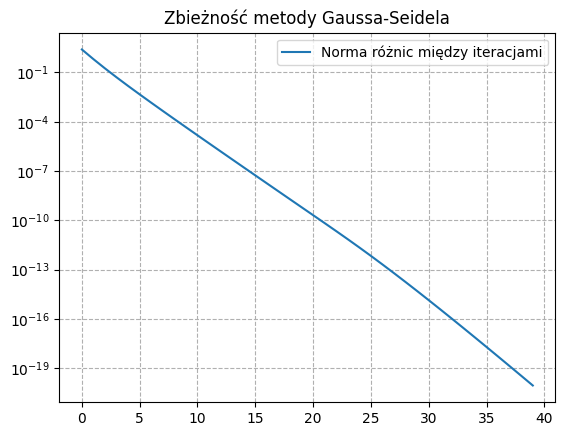

In [21]:
n = 20
A_ex2 = np.zeros((n, n))

for i in range(n):
    A_ex2[i, i] = 4
for i in range(n - 1):
    A_ex2[i, i + 1] = -1
    A_ex2[i+1, i] = -1

B_ex2 = np.zeros(n)
B_ex2[-1] = 10

result, errors = gauss_seidel(A_ex2, B_ex2)

print("Rozwiązanie metodą Gaussa-Seidela:")
print(result, "\n")
print("Róznica między rozwiązaniem dokładnym:")
print(np.abs(np.linalg.solve(A_ex2, B_ex2) - result))

plt.plot(errors, label="Norma różnic między iteracjami")  
plt.yscale("log")     
plt.title("Zbieżność metody Gaussa-Seidela")
plt.grid(linestyle="--")
plt.legend()
plt.show()

Jak widać różnice między rozwiązaniem metodą Gaussa-Seidela a rozwiązaniem funkcji wbudowanej są rzędu mniej więcej 1e-20, czyli takiej, jaką dokładność ustawiono domyślnie w funkcji gauss_seidel().

### Zadanie 3

Rozwiąż układ z zadania 2 dowolną metodą dokładną (możesz skorzystać
z funkcji bibliotecznych). Porównaj nakład obliczeń w obu przypadkach.


In [30]:
start_time_gs = time.time()
gauss_seidel(A_ex2, B_ex2)
gs_time = time.time() - start_time_gs

start_time_np = time.time()
np.linalg.solve(A_ex2, B_ex2)
np_time = time.time() - start_time_np

print("czas działania funkcji gauss_seidel:    ", gs_time)
print("czas działąnia funkcji wbudowanej numpy:", np_time)
print("stosunek czasu wykonywania obu funkcji: ", gs_time/np_time)

czas działania funkcji gauss_seidel:     0.03756833076477051
czas działąnia funkcji wbudowanej numpy: 0.0005545616149902344
stosunek czasu wykonywania obu funkcji:  67.74419604471196


Jak widać, rozwiązanie metodą Gaussa-Seidela jest dużo bardziej czasochłonne niż rozwiązanie funkcją wbudowaną numpy

### Zadanie 4
Niech $B \in \mathbb{R}^{20 \times 20}$ będzie górną macierzą dwudiagonalną o elementach $0.025, 0.05, 0.075, \ldots, 0.5$ na głównej diagonali, i wszystkich elementach równych $5$ na diagonali ponad nią. Oblicz i przedstaw na wykresie 

$$
\eta_k = \frac{\| x^{(k)} \|_2}{\| x^{(0)} \|_2}, \quad k = 1, \ldots, 100,
$$

gdzie

$$
x^{(k+1)} = B x^{(k)}, \quad x^{(0)} = (1, 1, \ldots, 1)^{\mathrm{T}}.
$$

Pokaż, że początkowo $\eta_k > 10^{14}$ i dopiero po 25 iteracjach wielkość ta zaczyna maleć. Wyznacz najmniejsze $k$, dla którego $\| x^{(k)} \|_2 < \| x^{(0)} \|_2$.


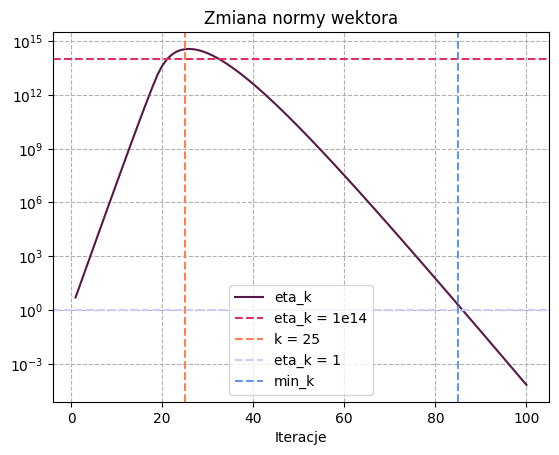

najmniejsze k:  85


In [52]:
n = 20
B = np.zeros((n, n))

for i in range(n):
    B[i, i] = 0.025 * (i + 1)
for i in range(n - 1):
    B[i, i + 1] = 5

x_0 = np.ones(n)
norm_x_0 = np.linalg.norm(x_0)
eta_k = []
min_k = None

x_k = x_0
for k in range(100):
    x_k = np.dot(B, x_k)
    eta_k.append(np.linalg.norm(x_k) / norm_x_0)

    if np.linalg.norm(x_k) < norm_x_0:
        if min_k == None:
            min_k = k

plt.plot(range(1, len(eta_k) + 1), eta_k, label="eta_k", color="#581845")
plt.xlabel("Iteracje")
plt.axhline(1e14, label="eta_k = 1e14", linestyle="--", color="#DE3163")
plt.axvline(25, label="k = 25", linestyle="--", color="#FF7F50")
plt.axhline(1, label="eta_k = 1", linestyle="--", color="#CCCCFF")
plt.axvline(min_k, label="min_k", linestyle="--", color="#6495ED")
plt.yscale("log")
plt.legend()
plt.grid(linestyle="--")
plt.title("Zmiana normy wektora")
plt.show()
print("najmniejsze k: ", min_k)